# Tool to extract usefull information from mlperf trace

In [6]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize=(12, 8)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [7]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"] /1e9
            d["issue_to_done"] = args["issue_to_done"] / 1e9
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e9
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [8]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [9]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/none-resnet-1-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_start_ns,complete_ns,issue_to_done
count,3.379300e+04,1.025000e+03,32768.0,3.276800e+04,32768.000000
mean,3.693691e+06,8.662966e+04,508.0,1.168306e+11,116.830606
std,2.293730e+07,2.773145e+06,0.0,6.423618e+10,64.236176
min,1.534743e+05,3.894000e+00,508.0,4.166881e+09,4.166881
25%,1.534743e+05,7.312000e+00,508.0,6.097668e+10,60.976676
50%,1.534743e+05,8.690000e+00,508.0,1.171760e+11,117.175984
75%,1.534743e+05,1.211200e+01,508.0,1.722292e+11,172.229158
max,2.253783e+08,8.878399e+07,508.0,2.252248e+11,225.224797


In [10]:
df["name"].unique()

array(['Sample', 'IssueQuery', 'QuerySamplesComplete'], dtype=object)

In [119]:
df

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,1.792659e+05,Sample,NaN,790.0,8.425285e+09,8.425284
22196,1.792659e+05,Sample,NaN,790.0,1.584654e+11,158.465404
22195,1.792659e+05,Sample,NaN,790.0,1.584654e+11,158.465404
22194,1.792659e+05,Sample,NaN,790.0,1.584654e+11,158.465404
22193,1.792659e+05,Sample,NaN,790.0,1.584654e+11,158.465404
...,...,...,...,...,...,...
33660,2.334242e+08,QuerySamplesComplete,24.473,NaN,NaN,NaN
33693,2.334376e+08,QuerySamplesComplete,7.137,NaN,NaN,NaN
33726,2.334477e+08,QuerySamplesComplete,6.016,NaN,NaN,NaN
33759,2.334611e+08,QuerySamplesComplete,7.509,NaN,NaN,NaN


In [120]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
0,179265.855,Sample,NaN,790.0,8.425285e+09,8.425284
22196,179265.855,Sample,NaN,790.0,1.584654e+11,158.465404
22195,179265.855,Sample,NaN,790.0,1.584654e+11,158.465404
22194,179265.855,Sample,NaN,790.0,1.584654e+11,158.465404
22193,179265.855,Sample,NaN,790.0,1.584654e+11,158.465404
...,...,...,...,...,...,...
11073,179265.855,Sample,NaN,790.0,8.154350e+10,81.543494
11018,179265.855,Sample,NaN,790.0,8.118370e+10,81.183696
11072,179265.855,Sample,NaN,790.0,8.154350e+10,81.543494
11066,179265.855,Sample,NaN,790.0,8.154350e+10,81.543494


In [121]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
12672,179267.034,IssueQuery,9.330296e+07,NaN,NaN,NaN


In [122]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done


In [123]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_start_ns,complete_ns,issue_to_done
32,8.604551e+06,QuerySamplesComplete,26.373,NaN,NaN,NaN
65,8.670928e+06,QuerySamplesComplete,11.860,NaN,NaN,NaN
98,8.885673e+06,QuerySamplesComplete,11.299,NaN,NaN,NaN
131,8.902604e+06,QuerySamplesComplete,10.535,NaN,NaN,NaN
164,9.013204e+06,QuerySamplesComplete,10.313,NaN,NaN,NaN
...,...,...,...,...,...,...
33660,2.334242e+08,QuerySamplesComplete,24.473,NaN,NaN,NaN
33693,2.334376e+08,QuerySamplesComplete,7.137,NaN,NaN,NaN
33726,2.334477e+08,QuerySamplesComplete,6.016,NaN,NaN,NaN
33759,2.334611e+08,QuerySamplesComplete,7.509,NaN,NaN,NaN


# offline scenario

In [84]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

path = "/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/"
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df.head()

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,offline,1,1,99.611633,164.689851,164.642285,263.302158,296.141216,312.596354,325.742676,328.704836
1,resnet,none,32,1,offline,2,1,111.888205,146.959430,147.055617,234.771776,263.894674,278.542244,290.184709,292.727467
2,resnet,none,32,1,offline,4,1,124.161137,132.729634,132.820157,211.855608,238.090795,251.265350,261.775215,263.839413
3,resnet,none,32,1,offline,8,1,135.516154,122.119555,122.037627,194.566137,218.788524,230.882423,240.349893,241.742344
4,resnet,none,32,1,offline,16,1,139.588602,120.161750,119.957378,190.143934,213.343249,225.162685,234.263197,234.654853


In [85]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
%matplotlib inline
dfg = df
dfg

,benchmark,k8senv,sbatch,numctn,cscenario,cbatch,reps,qps,mean,p50,p80,p90,p95,p99,p999
0,resnet,none,32,1,offline,1,1,99.611633,164.689851,164.642285,263.302158,296.141216,312.596354,325.742676,328.704836
1,resnet,none,32,1,offline,2,1,111.888205,146.959430,147.055617,234.771776,263.894674,278.542244,290.184709,292.727467
2,resnet,none,32,1,offline,4,1,124.161137,132.729634,132.820157,211.855608,238.090795,251.265350,261.775215,263.839413
3,resnet,none,32,1,offline,8,1,135.516154,122.119555,122.037627,194.566137,218.788524,230.882423,240.349893,241.742344
4,resnet,none,32,1,offline,16,1,139.588602,120.161750,119.957378,190.143934,213.343249,225.162685,234.263197,234.654853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,resnet,none,32,32,offline,2,10,105.454313,20.016994,20.041399,31.216490,34.995542,36.836307,37.739634,38.214003
356,resnet,none,32,32,offline,4,10,113.122617,19.654216,19.774414,30.019613,33.453474,34.312230,34.892304,35.679248
357,resnet,none,32,32,offline,8,10,119.357096,21.114762,21.371882,32.075487,33.121745,33.497649,33.883925,34.284707
358,resnet,none,32,32,offline,16,10,119.920546,41.969857,42.979630,61.851387,65.206622,66.470225,67.793755,68.283737


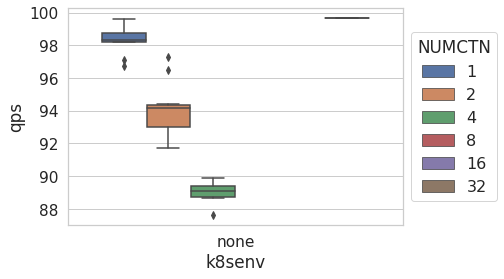

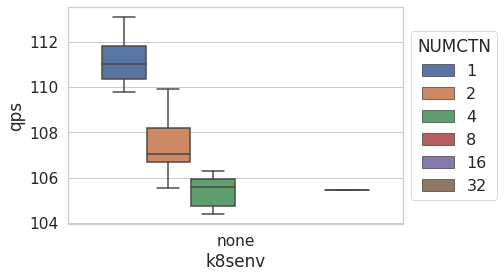

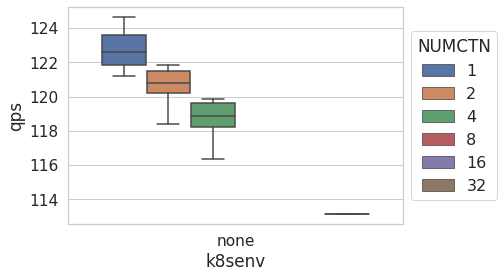

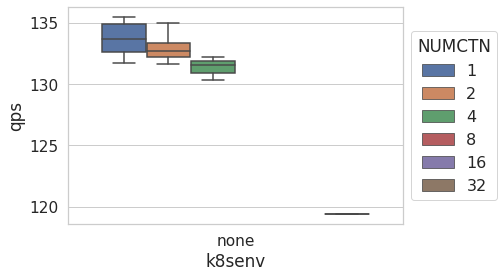

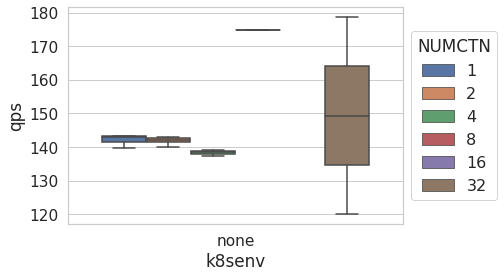

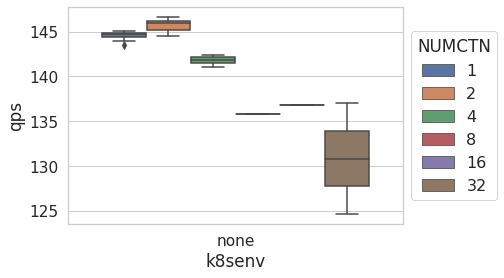

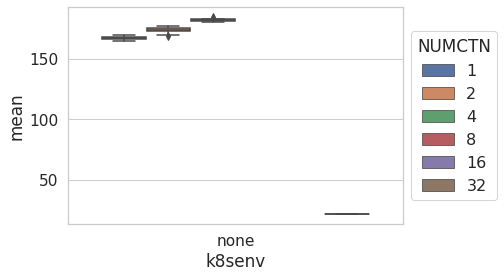

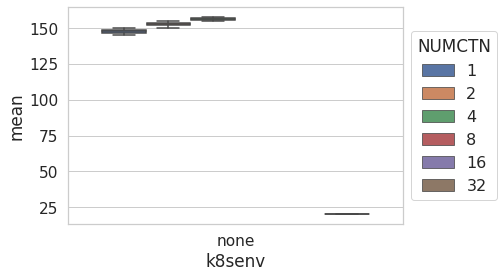

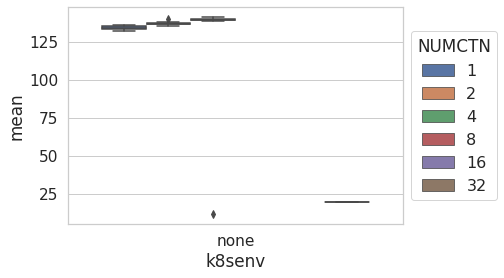

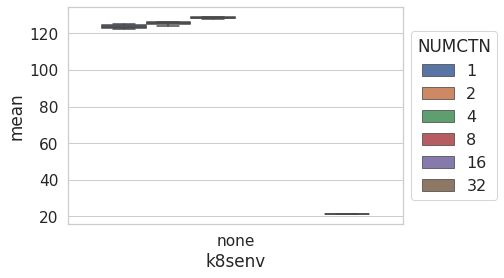

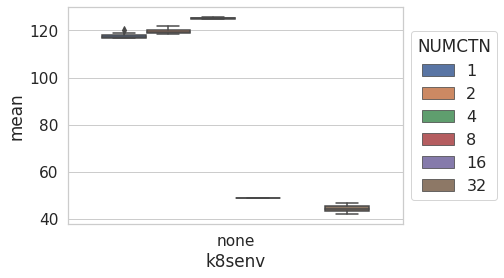

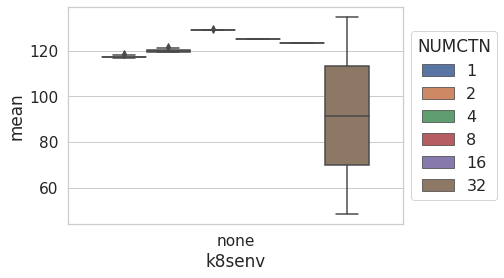

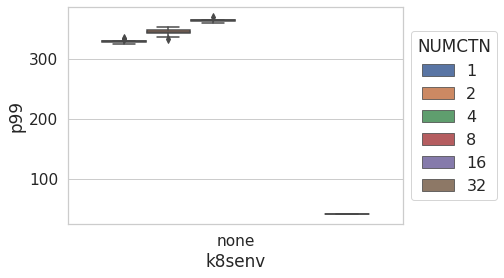

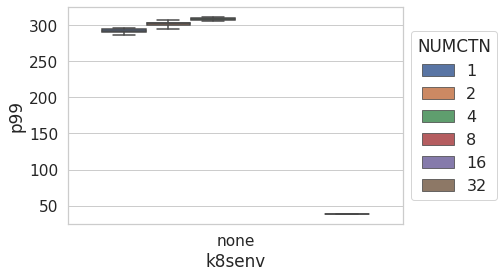

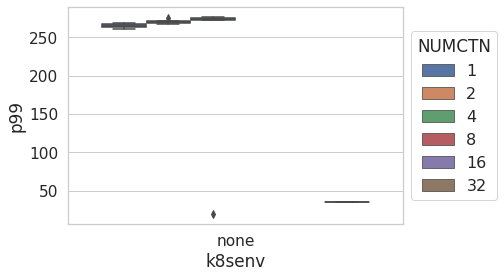

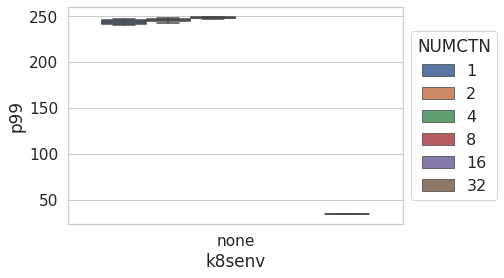

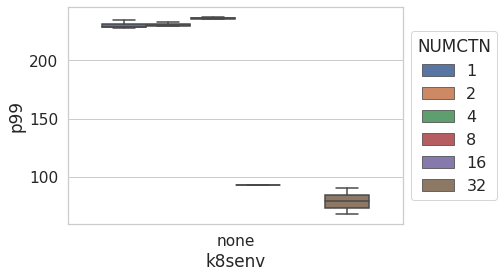

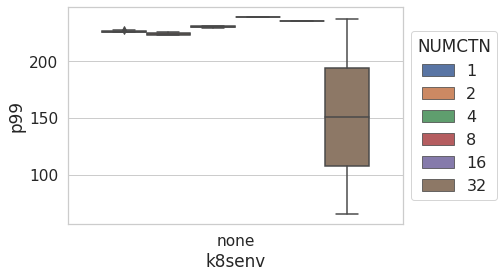

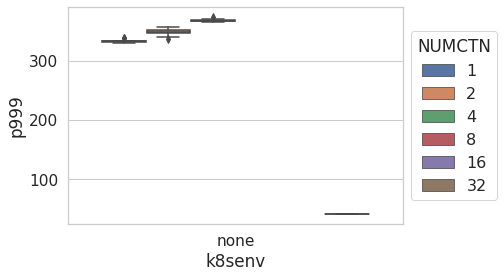

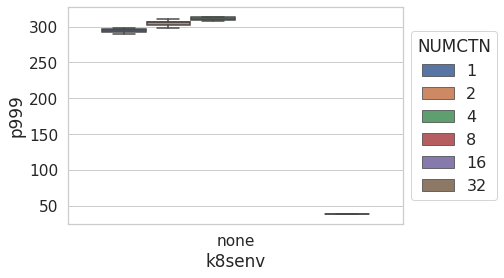

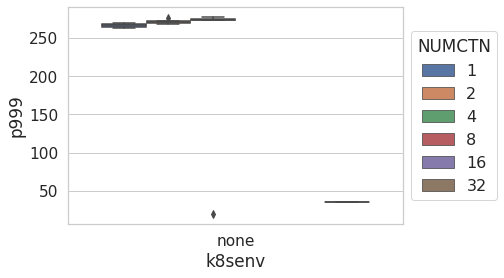

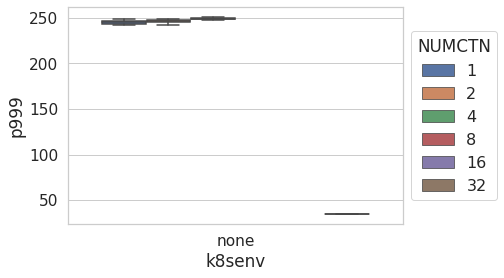

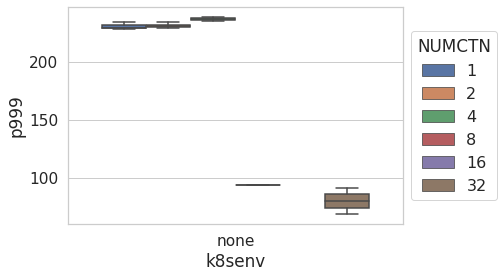

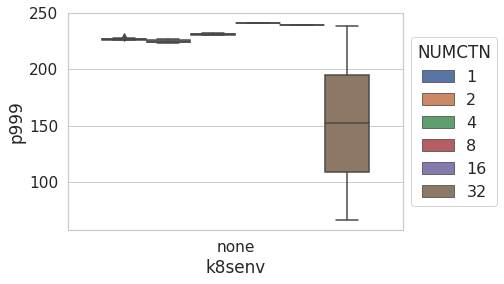

In [86]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

# import seaborn library
import seaborn as sns

for x in ['qps','mean','p99','p999']:
    for cbatch in [1,2,4,8,16,32]:
        for model_name in ['resnet']:
            list_traces = []
#             for numctn in [1,2,4,8,16,32]: 
            dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & \
#                             (dfg['numctn']==numctn) &\
                        ((dfg['k8senv']=='none') |\
                         (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
#             print(dfg_bench)

            sns.boxplot(x = dfg_bench['k8senv'],
                        y = dfg_bench[x],
                        hue = dfg_bench['numctn'])
            plt.legend(prop={'size': 16}, title = 'NUMCTN',loc='center left', bbox_to_anchor=(1, 0.5) )
            plt.show()


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from reportlab.pdfgen import canvas

from numpy import percentile, mean, std
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode, iplot

import plotly.io as pio
pio.templates.default = "none"
# pio.templates.default = "simple_white"

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
# import plotly.express as px

for x in ['qps','mean','p99']:
    for cbatch in [16,32]:
        for model_name in ['resnet']:
            list_traces = []
            for numctn in [1,2,4,8,16,32]: 
                dfg_bench = dfg[(dfg['benchmark']== model_name)  & (dfg['cbatch']==cbatch) & (dfg['numctn']==numctn) &\
                            ((dfg['k8senv']=='none') |\
                             (dfg['k8senv']=='cpumem')| (dfg['k8senv']=='cpumemory'))]
#                 print(dfg_bench)


                #data
                trace = go.Scatter(
                    name="ctn"+str(numctn),
                    x=[ 'none','cpumem','cpu'],
                    y= dfg_bench[x].values.tolist(),
        #             error_y = dict(type='data', array=df1_bench['model_time_std'].values.tolist()),
                    opacity=0.7,
                    mode='markers'
                )
                list_traces.append(trace)



            #layout
            layout = go.Layout(
                title={
                    'text': "exp18(cpu32)= inter16,intra32 -> inter1,intra2; restapi=32" ,
                    'y':0.85,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                width=1000,
                height=460,
                xaxis=dict(
                    title= "scenarios",
                    tickvals=[ 'none','cpumem','cpu'],
                    titlefont=dict(
                        size=10,
                        color='rgb(107, 107, 107)'
                    ),
                    tickfont=dict(
                        size=10,
                        color='rgb(107, 107, 107)'
                    )
                ),
                yaxis=dict(
                    title= x+"batch"+str(cbatch),
                    automargin=True,
                    titlefont=dict(
                        size=25,
                        color='rgb(107, 107, 107)'
                    ),
                    tickfont=dict(
                        size=25,
                        color='rgb(107, 107, 107)'
                    ),    
                ),
                legend=dict(
                    x=1.0,
                    y=1.0,
                    bgcolor='rgba(255, 255, 255, 0)',
                    bordercolor='rgba(255, 255, 255, 0)',
                    font = dict( size = 28)
                ),
                barmode='group',
                bargap=0.15,
                bargroupgap=0.08
        #         legend_orientation="h"
            )

        data = list_traces
        fig = go.Figure(data=data, layout=layout)
        fig.update_layout(legend_orientation="h")
        fig.show()    

    #     fig.write_image(path + model_name + k8senv +'.pdf')

In [13]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
SCEN=[
    'none-resnet-1-32-O-32-1',
      'none-resnet-2-32-O-32-1',
            'none-resnet-4-32-O-32-1',
           'none-resnet-8-32-O-32-1',
      'none-resnet-16-32-O-32-1',
      'none-resnet-32-32-O-32-1'
]
x=0
for add in SCEN:
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/"+add+"/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["IssueQuery"])]
    print(df1)
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('IssueQuery duration (usec)');
#     x=x+1
#     plt.show()

# df1['delta'].describe()

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-O-32-1/mlperf_log_trace.json'

In [ ]:
# # for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
32768
82.284
3.12
3.373889739990246
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
32768
84.302
3.133
3.4216262817382987
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
32768
90.963
3.062
3.324547515869146
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
32768
86.055
2.927
3.171759765624984
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-1-10/mlperf_log_trace.json

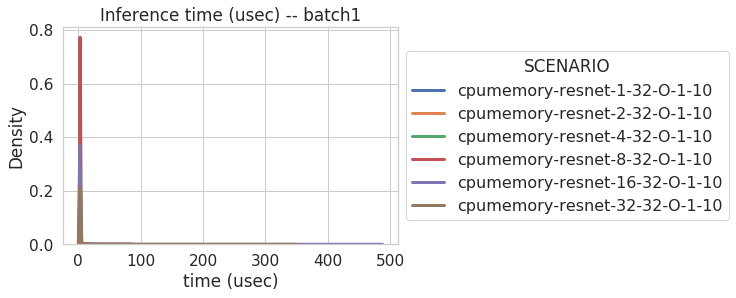

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
16384
97.358
3.63
4.335407958984355
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
16384
67.317
3.547
3.9742299194336006
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
16384
136.434
3.437
3.8661093139648637
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
16384
109.778
3.63
4.123565979003919
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-2-10/mlperf_log_trace.js

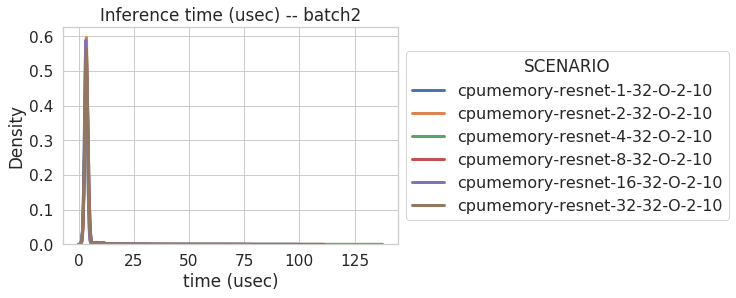

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
8192
87.167
3.923
4.650084350585942
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
8192
114.074
4.147
4.800302856445322
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
8192
66.357
4.173500000000001
4.8222559814453225
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
8192
56.981
4.18
4.811119873046884
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-4-10/mlperf_log_t

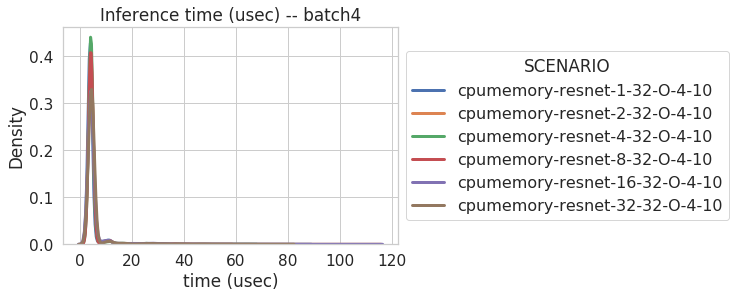

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
74.358
5.117
6.155856689453122
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
80.751
5.037
6.868924804687495
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
98.148
5.172
6.329106933593741
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
85.886
5.0755
6.257025146484378
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-8-10/mlperf_log_trace.json' m

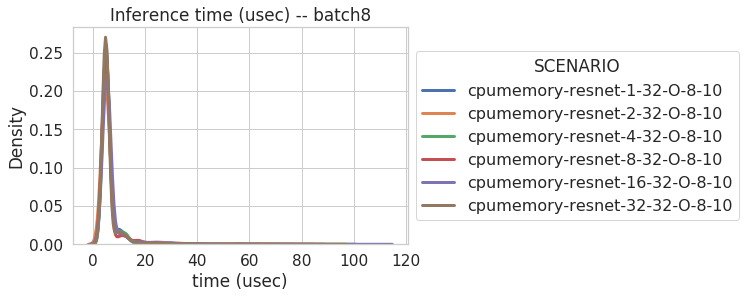

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
2048
72.831
6.1805
7.746193847656256
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
2048
81.47
6.468
7.894782714843762
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
2048
71.476
6.351
8.068601562499984
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
2048
72.862
6.1175
7.546264160156259
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-O-16-10/mlperf_log_trace.js

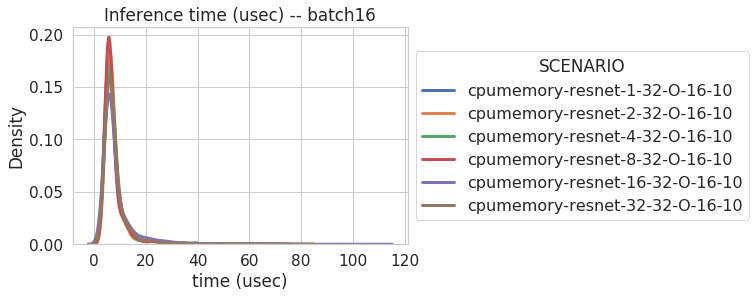

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-1-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1024
92.065
8.946
11.710781249999993
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-2-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1024
66.036
8.219999999999999
10.470191406249995
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-4-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1024
65.733
8.463000000000001
10.604744140625007
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-8-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1024
62.62
8.2865
10.466889648437496
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/cpumemory-resnet-16-32-

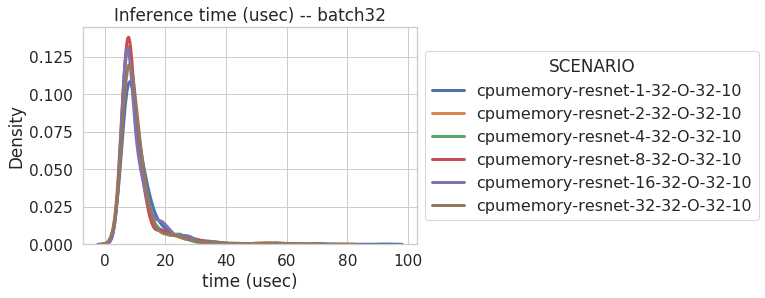

In [12]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for hardware in ['cpumemory']:
    for batch in ['1','2','4','8','16','32']:
        SCEN=[
            hardware+'-resnet-1-32-O-'+batch+'-10',
              hardware+'-resnet-2-32-O-'+batch+'-10',
                    hardware+'-resnet-4-32-O-'+batch+'-10',
                   hardware+'-resnet-8-32-O-'+batch+'-10',
              hardware+'-resnet-16-32-O-'+batch+'-10',
              hardware+'-resnet-32-32-O-'+batch+'-10'
        ]
        x=0
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp1/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["QuerySamplesComplete"])]
            print(len(df1))
            print(max(df1['dur']))
            print(np.median(df1['dur']))
            print(np.mean(df1['dur']))
        #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
        #     ax.set_title('Inference time (usec)');
        #     x = x+1
        #     plt.show()

            # Draw the density plot
            sns.distplot(df1['dur'], hist = False, kde = True,
                         kde_kws = {'linewidth': 3},
                         label = SCEN[x])
            x=x+1

        # Plot formatting
        plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.title('Inference time (usec) -- batch'+str(batch))
        plt.xlabel('time (usec)')
        plt.ylabel('Density')
        plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


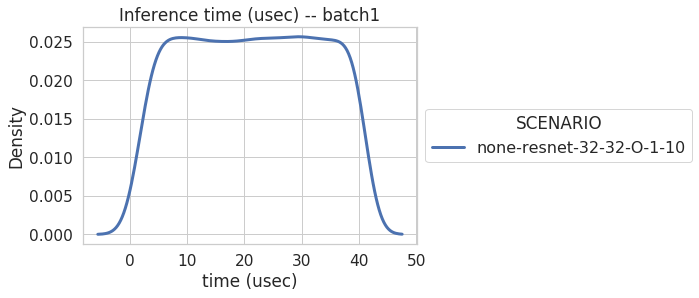

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


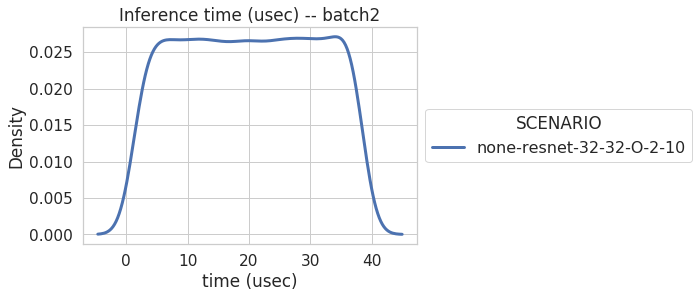

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


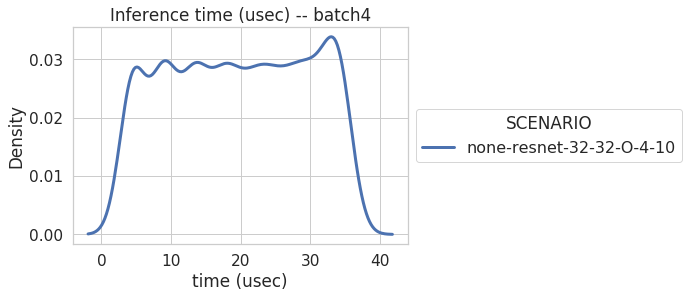

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


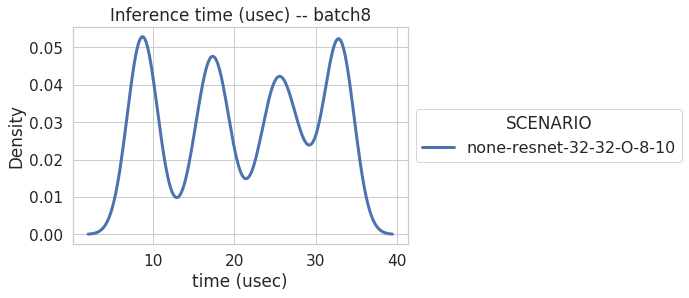

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


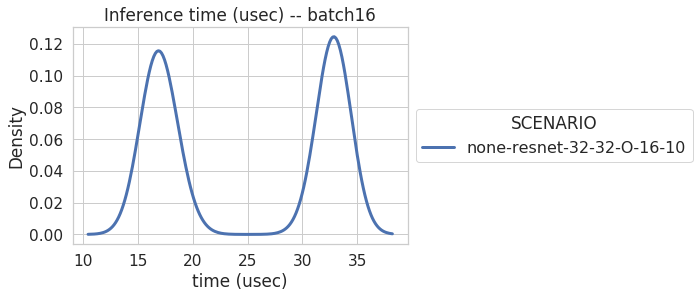

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


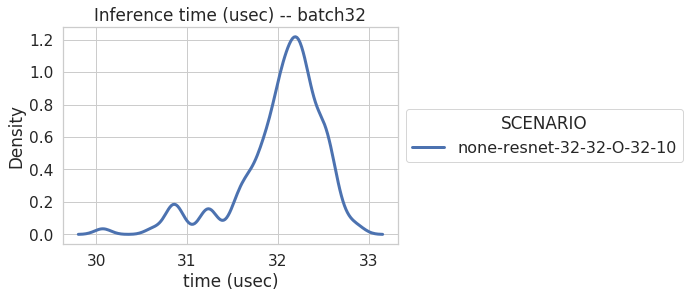

In [26]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for hardware in ['none']:
    for batch in ['1','2','4','8','16','32']:
#     for batch in ['16','32']:
        SCEN=[
#                 hardware+'-resnet-1-32-O-'+batch+'-10',
#                   hardware+'-resnet-2-32-O-'+batch+'-10',
#                         hardware+'-resnet-4-32-O-'+batch+'-10',
#                        hardware+'-resnet-8-32-O-'+batch+'-10',
#                   hardware+'-resnet-16-32-O-'+batch+'-10',
                  hardware+'-resnet-32-32-O-'+batch+'-10'
            ]
        x=0
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["Sample"])]
    #         print(max(df1['dur']))
    #         print(np.median(df1['dur']))
    #         print(np.mean(df1['dur']))
        #     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
        #     ax.set_title('Inference time (usec)');
        #     x = x+1
        #     plt.show()

            # Draw the density plot
            sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                         kde_kws = {'linewidth': 3},
                         label = SCEN[x])
            x=x+1

        # Plot formatting
        plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.title('Inference time (usec) -- batch'+str(batch))
        plt.xlabel('time (usec)')
        plt.ylabel('Density')
        plt.show()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096


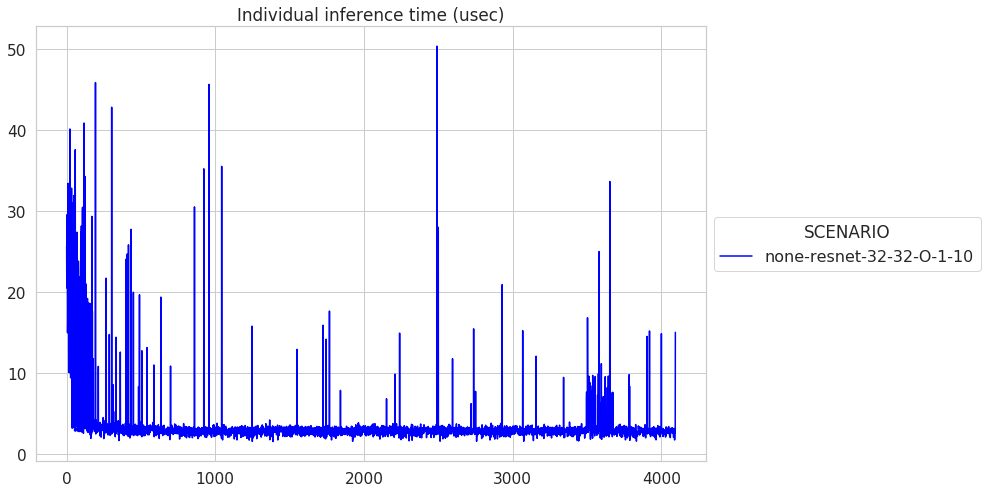

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-2-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
2048


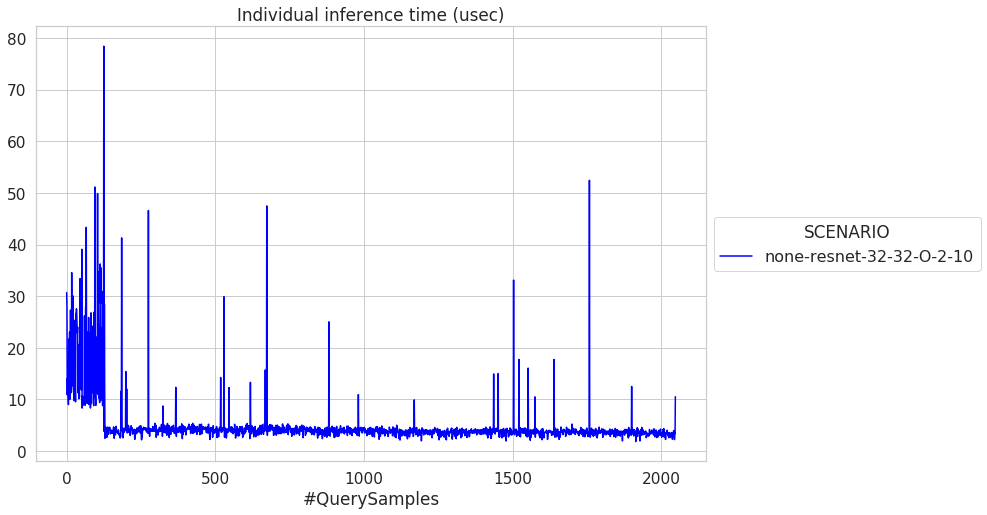

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-4-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1024


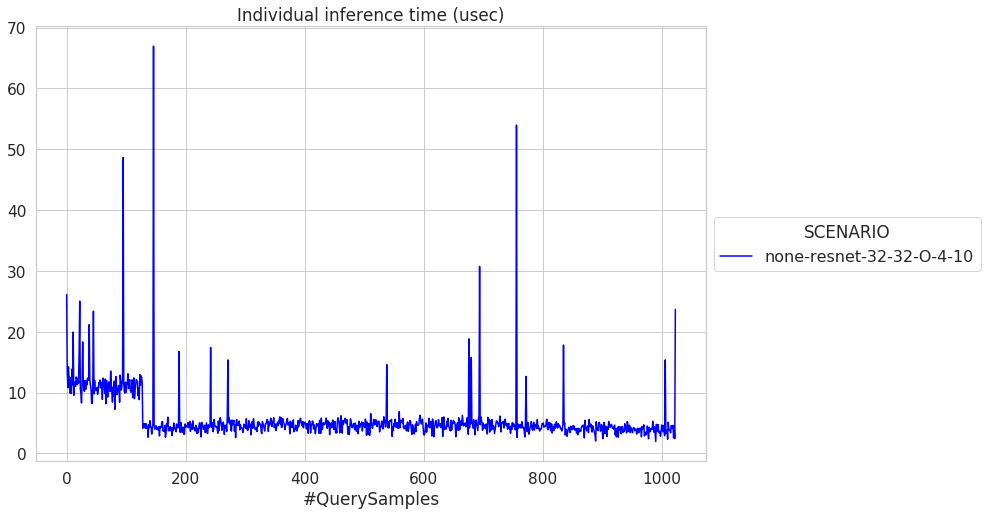

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-8-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
512


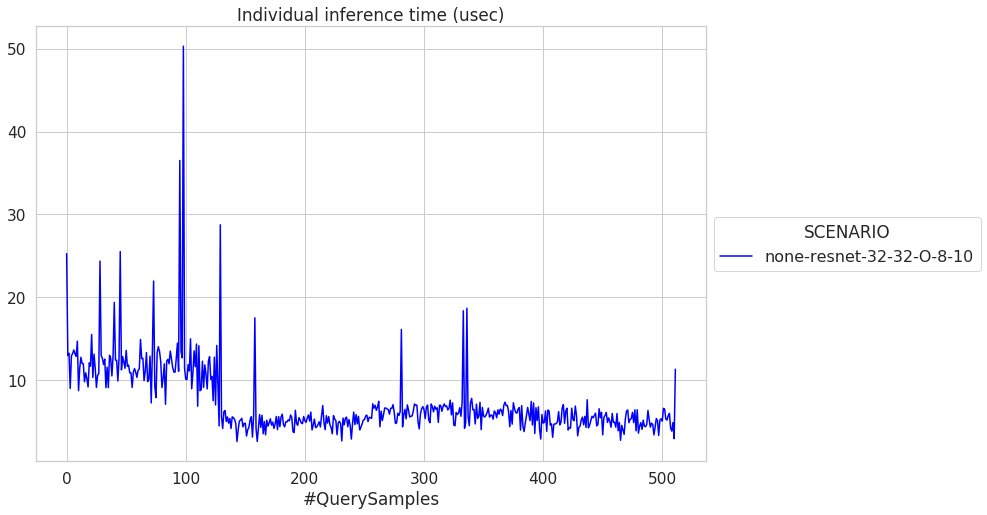

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-16-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
256


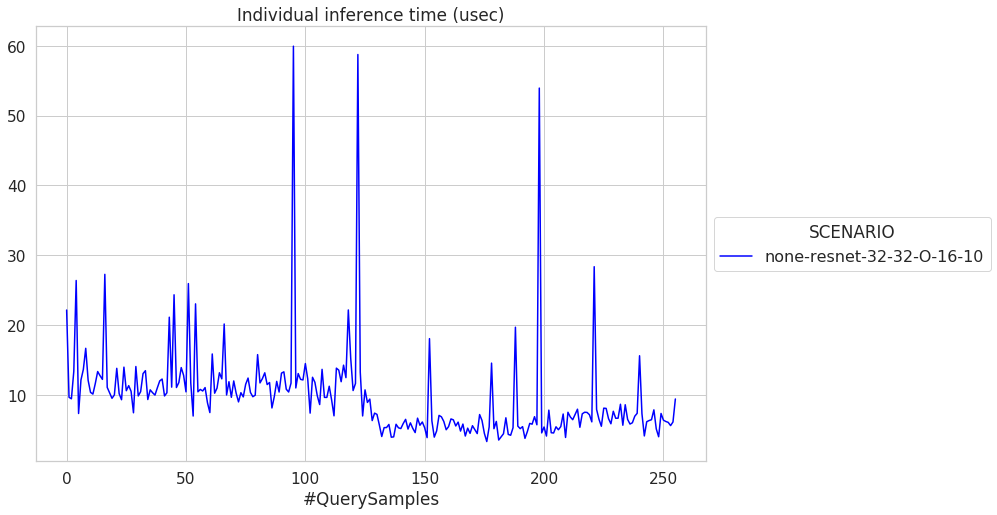

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-32-32-O-32-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
128


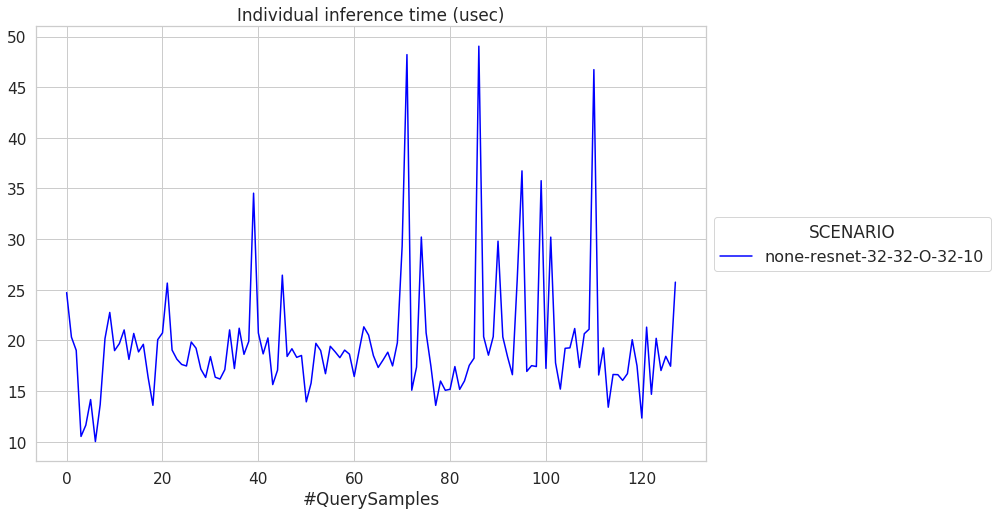

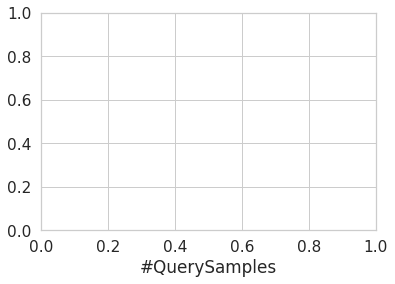

In [25]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
# for batch in ['32']:
for batch in ['1','2','4','8','16','32']:
    SCEN=[
#         'none-resnet-1-32-O-'+batch+'-10',
#           'none-resnet-2-32-O-'+batch+'-10',
#                 'none-resnet-4-32-O-'+batch+'-10',
#                'none-resnet-8-32-O-'+batch+'-10',
#           'none-resnet-16-32-O-'+batch+'-10',
          'none-resnet-32-32-O-'+batch+'-10'
    ]
    x=0
    for add in SCEN:
        df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/"+add+"/mlperf_log_trace.json")
        df1 = df[df["name"].isin(["QuerySamplesComplete"])]
        print(len(df1))
#         df1.sort_values("dur",inplace=True)
#         df1.reset_index(drop=True,inplace=True)
        df1.sort_index(inplace=True)
        df1.reset_index(drop=True,inplace=True)
        
        ax = df1['dur'].plot(figsize=figsize, color=color[x],label = SCEN[x])
        ax.set_title('Individual inference time (usec)');
#         ax.set(xlim=(0, 50))
#         ax.set(ylim=(0, 50))
        x=x+1
    plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.show()
    plt.xlabel('#QuerySamples')

In [132]:
df1 = df[df["name"].isin(["Sample"])]
len(df1)

32768

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-1-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
32768
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-2-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
32768
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-4-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
32768
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-8-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
32768
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/none-resnet-16-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
32768
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classificat

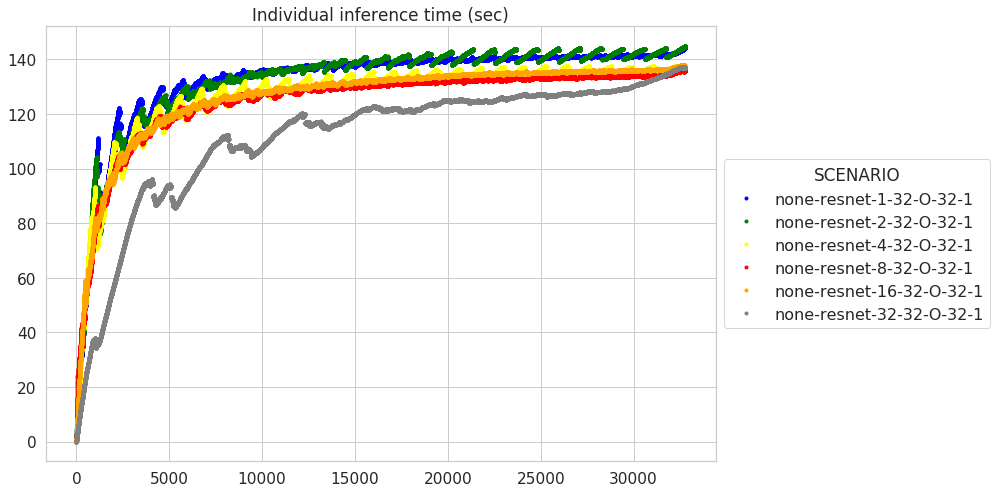

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/cpumemory-resnet-1-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/cpumemory-resnet-2-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/cpumemory-resnet-4-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/cpumemory-resnet-8-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/cpumemory-resnet-16-32-O-32-1/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
4096
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inferenc

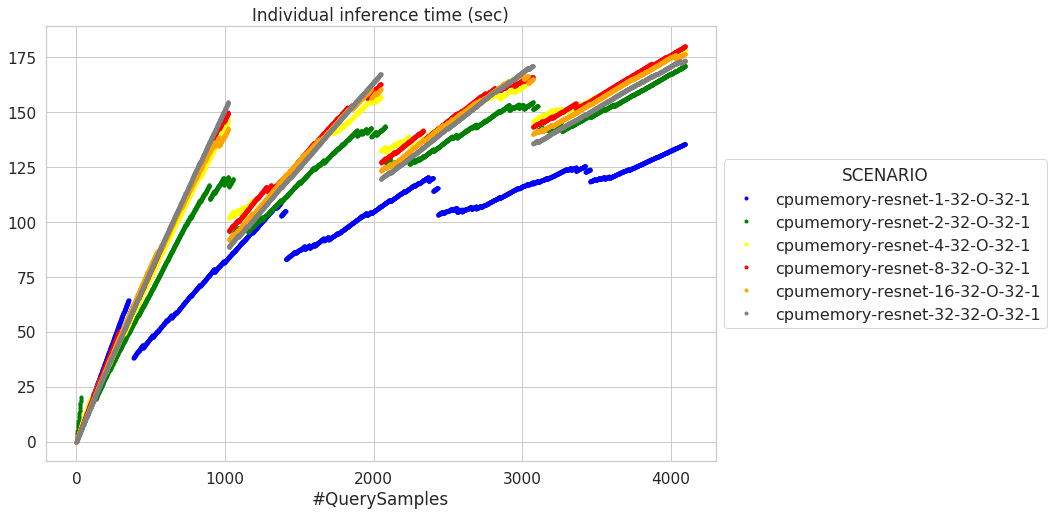

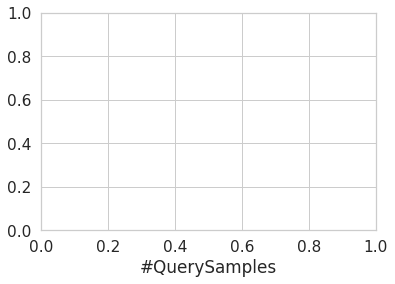

In [81]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
for hardware in ['none','cpumemory']:
    # for batch in ['1','2','4','8','16','32']:
    for batch in ['32']:
        SCEN=[
                    hardware+'-resnet-1-32-O-'+batch+'-1',
                      hardware+'-resnet-2-32-O-'+batch+'-1',
                            hardware+'-resnet-4-32-O-'+batch+'-1',
                           hardware+'-resnet-8-32-O-'+batch+'-1',
                      hardware+'-resnet-16-32-O-'+batch+'-1',
                      hardware+'-resnet-32-32-O-'+batch+'-1'
                ]
        x=0
        for add in SCEN:
            df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/exp-baseline/"+add+"/mlperf_log_trace.json")
            df1 = df[df["name"].isin(["Sample"])]
    #         print(df1)
            print(len(df1))

    #         df1.sort_values("issue_to_done",inplace=True)
    #         df1.reset_index(drop=True,inplace=True)

            df1.sort_index(inplace=True)
            df1.reset_index(inplace=True)
            df1.reset_index(inplace=True)
            df1["level_0"] = df1["level_0"] / df1['issue_to_done']
#             print(df1)

    #         print(df2)
    #         print(len(df1))
            ax = df1['level_0'].plot(figsize=figsize, color=color[x],label = SCEN[x],marker='.', linestyle='none')
            ax.set_title('Individual inference time (sec)');
    #         ax.set(ylim=(0, 20))
    #         ax.set(xlim=(-1, 4096))
            x=x+1
        plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
        plt.show()
        plt.xlabel('#QuerySamples')

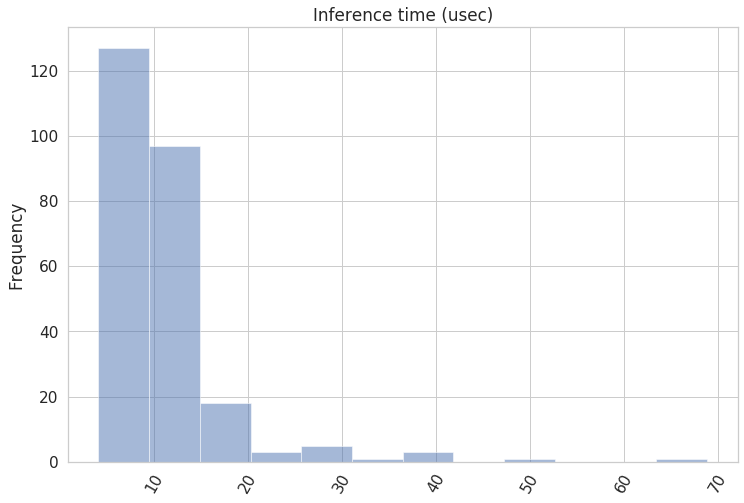

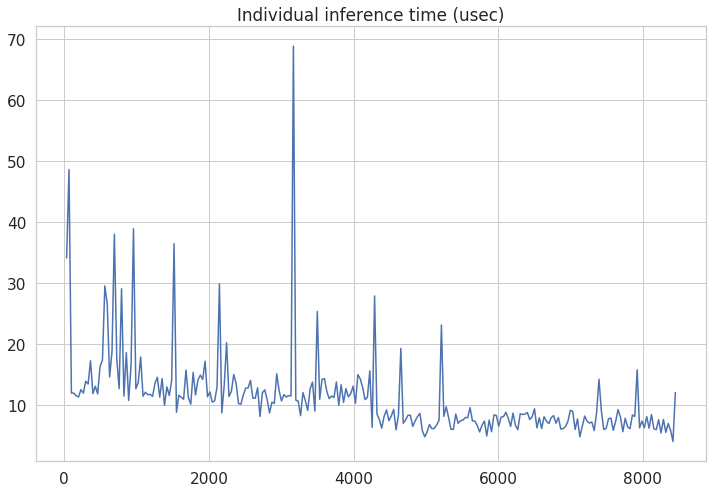

In [40]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['dur'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

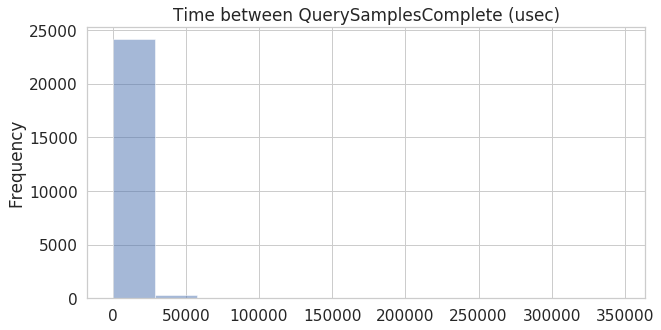

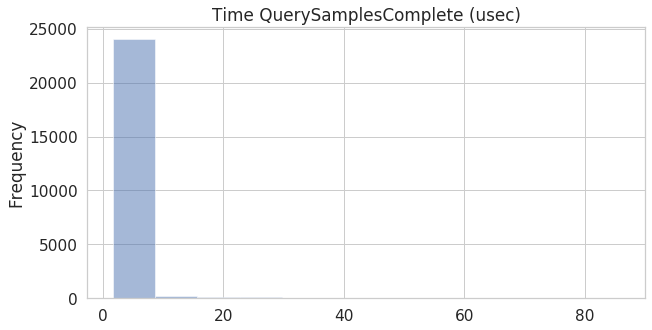

In [313]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');